In [0]:
import requests
from IPython.core.display import HTML
HTML(f"""
<style>
@import "https://cdn.jsdelivr.net/npm/bulma@0.9.4/css/bulma.min.css";
</style>
""")

# Linear Algebra
This tutorial will cover basic terms in linear algebra and their implementation in NumPy. 
The tutorial includes:
1. Data structures in linear algebra 
2. Vectors operations (addition , inner product, length vs number of elements ...)
3. Matrix operations 
4. Special matrices
5. Determinant and inverse of a matrix

## Data structures in linear algebra
Define:
- Scalar: Single number
- Vector: Array of numbers
- Matrix: 2-dimensional array of numbers
- Tensor: $n$-dimensional array of numbers where $n > 2$

NumPy represents a vector as a 1-D array, a matrix as a 2-D array (array of arrays), and an $n$-tensor as a $n$-dimensional array (e.g. A 3D-tensor is an array of 2D arrays etc.):
<div class="has-text-centered">
<figure class="image is-inline-block" id="arrays">

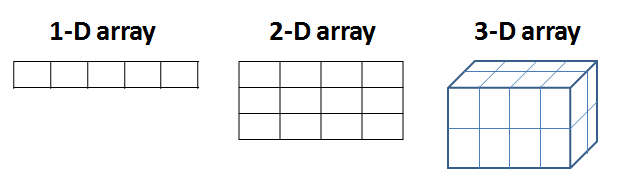

<figcaption class="figure-caption has-text-centered">Figure 1</figcaption>
</figure>
</div>
The following cells demonstrates how to create Numpy arrays:


In [0]:
#import the numpy lib
import numpy as np

In [0]:
#Vector with 4 elements:
a = np.array([1, 6, 3, 1])
print(a)

In [0]:
# A 2x4 matrix:
A = np.array([[1, 42, 6, 4], [2, 6, 87, 2]])
print(A)

In [0]:
#print the size of the matrix
print(A.shape)

In [0]:
# A 2x2x4 tensor:
T = np.array([[[1, 23, 3, 4], [42, 6, 7, 87]], [[9, 3, 11, 2], [2, 22, 15, 101]]])
print(T)

In [0]:
#print the size of the tensor
print(T.shape)

## Vector Operations
**A vector multiplied by a scalar:** 


In [0]:
a = np.array([3, 22, 3, 21])
a * 2

**dot product/ inner product:** The dot product (see lecture slides for details) of vectors $a$ and $b$ with $n$ elements each: 

$$
a\cdot b =\sum_i^N a_ib_i = a^\top b
$$
The **dot product** can be calculated using the Numpy function [`np.dot(a,b)`
](https://numpy.org/devdocs/reference/generated/numpy.dot.html<elem-17>.dot)
: 


In [0]:
#Create 2 vectors v1 and b
a = np.array([1, 2, 3, 42])
b = np.array([2, 3, 4, 5])
# calculate the dot product
np.dot(a, b)

**Summation and Subtraction of 2 vectors:**  Elementwise summation/subtraction/multiplication 
<article class="message is-info">
  <div class="message-header">Note</div>
  <div class="message-body">
  
  The elementwise operations also exist for matrices and tensors. 

  
  </div>
</article>



In [0]:
#create 2 vectors
a = np.array([1, 2, 3, 42])
b = np.array([2, 3, 4, 5])

print("a + b is : \n", a + b)
print("a - b is :  \n", a - b)
print("a * b is :  \n", a * b)

## Length and dimensionality of vectors
The Euclidean distance ($L2$-norm) of a vector $a$ is the square root of the inner product 
$$ |a| =\sqrt{\sum_i^N a_i^2 }= \sqrt{a^\top a}$$
.


In [0]:
# inner product of v1 with itself
a_a_inner_product = np.dot(a, a)
Euc_len_a = np.sqrt(a_a_inner_product)
print('Euclidean distance of v1:', Euc_len_a)

The Euclidean length can also be determined by a single built-in numpy function [`np.linalg.norm()`
](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html<elem-26>.linalg.norm)



In [0]:
print('Euclidean distance of v1:', np.linalg.norm(a))

### Orthogonal and normal vectors
Vectors $a$ and $b$ are considered orthogonal/perpendicular if $ a^\top b=0$.
<article class="message is-info">
  <div class="message-header">Recall</div>
  <div class="message-body">
  
  Recall that the dot product is related to the angle between vectors $a$ and $b$:

$$
\cos(\theta)  = \frac{a \cdot b}{\|a\| \|b\|}
$$

  
  </div>
</article>



In [0]:
# Orthognonal vectors
a = np.array([1, -2, 4])
b = np.array([2, 5, 2])

print(a.dot(b))  ## Alternative way to do dot product. Equivalent to (np.dot(a,b))

**Orthonormal vectors:** Defined as two orthogonal vectors both with unit length.
In the cell below, orthogonal vectors `a`
 and `b`
 are normalized by division with their length. 


In [0]:
a_normalized = a / np.linalg.norm(a)
print('a_normalized:', a_normalized)
b_normalized = b / np.linalg.norm(b)
print('b_normalized:', b_normalized)

#inner product of orthonormal vectors
print('inner product of a_normalized and b_normalized: \n', a_normalized.dot(b_normalized))

## Matrix Operations
The following section provides an overview of important matrix properties and well-known matrix compositions. 
**Square matrix:** A two-dimensional array with the same number of rows and columns.


In [0]:
A = np.random.randint(5, size=(3, 3))
A

**Identity matrix** is a square matrix that contains ones on the diagonal and zeros elsewhere.
The NumPy function [`np.identity(N)`
](https://numpy.org/doc/stable/reference/generated/numpy.identity.html#numpy-identity)
 creates an identity matrix with N elements on the diagonal. 


In [0]:
I3 = np.identity(3)
I3

In [0]:
I4 = np.identity(4)
I4

**Diagonal matrix:** A diagonal matrix is a matrix with non-zero elements in the diagonal and zeroes elsewhere.
The NumPy function `np.diag(a)`
 creates a 2D array (diagonal matrix)
given a 1D array (list/vector containing diagonal elements) as input. 


In [0]:
# Create an array:
v = np.array([3., 2., 5.])

In [0]:
# Create a matrix with elements of v on the diagonal:
D = np.diag(v)
print(D)

## Matrix multiplication
**Matrix multiplication of two matrices consist of inner products of row-column pairs:**
Consider the matrices A1 and A2:


In [0]:
A1 = np.array([[1, 3, 0], [4, 4, 4]])
A2 = np.array([[2, 2], [0, 4], [2, 3]])

<article class="message is-warning">
  <div class="message-header">Tip</div>
  <div class="message-body">
  
  In Numpy, matrices (and other arrays) are zero-indexed like regular Python lists. This is in contrast to mathematical notation, which is one-indexed.

  
  </div>
</article>

In the following, we demonstrate matrix multiplication as a series of inner products. The cell below shows matrix multiplication of `A1`
 and `A2`
 using the `dot`
 function in Numpy: 


In [0]:
np.dot(A1, A2)

The first element ($2$) of the result is calculated as the inner product of the first row of `A1`
 and the first column of `A2`
:


In [0]:
#A1 first row, A2 first column : position [1,1]
np.dot(A1[0, :], A2[:, 0])

Similarly, the other elements can be calculated using the appropriate combinations of rows `A1`
 and columns in `A2`
: 


In [0]:
#A1 second row, A2 first column : position [2,1]
print("A1 second row, A2 first column:", np.dot(A1[1, :], A2[:, 0]))

#A1 first row, A2 second column : position [1,2]
print("A1 first row, A2 second column:", np.dot(A1[0, :], A2[:, 1]))

#A1 second row, A2 second column : position [2,2]
print("A1 second row, A2 second column:", np.dot(A1[1, :], A2[:, 1]))

### Identity matrix
Multiplying a matrix A (from either left or right) with the identity matrix yields the matrix A. Thus, 

$$AI = A = IA.$$

An example is provided below:


In [0]:
# create 3x3 matrix A with random values between 0 and 4.
A = np.random.randint(5, size=(3, 3))

# create 3x3 identity matrix.
I = np.identity(3)

# multiply the matrices
R = np.dot(A, I)

print("A:\n", A, "\nI:\n", I, "\nmultiplication result:\n", R)

## Determinant and inverse of a matrix
We use [`np.linalg.det()`
](https://numpy.org/doc/stable/reference/generated/numpy.linalg.det.html<elem-59>.linalg.det)
 to get determinant of a matrix. 


In [0]:
# example matrices
A = np.array([[1, 1, 1], [0, 2, 5], [2, 5, -1]])
B = np.array([[0, 0, 0], [0, 2, 5], [2, 5, -1]])

# calculate the determinant 
print("det(A):", np.linalg.det(A))
print("det(B):", np.linalg.det(B))

The function [`np.linalg.inv(A)`
](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html<elem-62>.linalg.inv)
 can be used to calculate the inverse of a matrix. 
<article class="message is-info">
  <div class="message-header">Note</div>
  <div class="message-body">
  
  The function returns an error when the matrix is singular (i.e. the determinant is zero).

  
  </div>
</article>



In [0]:
print("A^-1:", np.linalg.inv(A))
print("B^-1:", np.linalg.inv(B))  # This yields an error because B is singular

The matrix A multiplied by its inverse yields the identity matrix:


In [0]:
np.dot(A, np.linalg.inv(A))

<article class="message is-info">
  <div class="message-header">Note</div>
  <div class="message-body">
  
  The result of the calculation above may be slightly off. This is due to the limitations of floating point numbers.

  
  </div>
</article>

### Diagonal matrices (determinant and inversion)


In [0]:
# Create a diagonal matrix 
A = np.diag([5, 2, 3])
A

The determinant of a diagonal matrix is the product of the elements on the diagonal. 


In [0]:
np.linalg.det(A)

The inverse of a diagonal matrix is the reciprocal of each element on the diagonal.


In [0]:
np.linalg.inv(A)

This concludes the tutorial.
